### Import necessary libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
trip02 = pd.read_csv('files/202102-divvy-tripdata.csv')
trip03 = pd.read_csv('files/202103-divvy-tripdata.csv')
trip01 = pd.read_csv('files/202101-divvy-tripdata.csv')
trip04 = pd.read_csv('files/202104-divvy-tripdata.csv')
trip05 = pd.read_csv('files/202105-divvy-tripdata.csv')
trip06 = pd.read_csv('files/202106-divvy-tripdata.csv')
trip07 = pd.read_csv('files/202107-divvy-tripdata.csv')
trip08 = pd.read_csv('files/202108-divvy-tripdata.csv')
trip09 = pd.read_csv('files/202109-divvy-tripdata.csv')
trip10 = pd.read_csv('files/202110-divvy-tripdata.csv')
trip11 = pd.read_csv('files/202111-divvy-tripdata.csv')
trip12 = pd.read_csv('files/202112-divvy-tripdata.csv')

In [ ]:
all_trips = pd.concat([trip01, trip02, trip03, trip04, trip05, trip06, trip07, trip08, trip09, trip10, trip11, trip12])

In [28]:
all_trips.info()
all_trips.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5595063 entries, 0 to 247539
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   start_station_name  object        
 3   end_station_name    object        
 4   member_casual       object        
 5   started_date        datetime64[ns]
 6   started_time        object        
 7   ended_date          datetime64[ns]
 8   ended_time          object        
dtypes: datetime64[ns](2), object(7)
memory usage: 459.1+ MB


(5595063, 9)

In [37]:
all_trips.drop(['start_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'end_station_id'], axis=1, inplace=True)

In [73]:
df = all_trips.copy()

In [85]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

mask = df['ended_at'] < df['started_at']
df.loc[mask, 'ended_at'] += pd.Timedelta(days=1)

df['ride_duration'] = round((df['ended_at'] - df['started_at']).dt.total_seconds() / 60 , 2)


In [79]:
df['month'] = df['started_at'].dt.month_name()
df['day'] = df['started_at'].dt.day_name()

In [91]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_duration,month,day
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,10.42,January,Saturday
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,4.07,January,Wednesday
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,member,1.33,January,Thursday


In [92]:
avg_ride_duration = round(df['ride_duration'].mean(), 2)
print(f"The average ride duration is {avg_ride_duration} minutes.")

The average ride duration is 21.97 minutes.


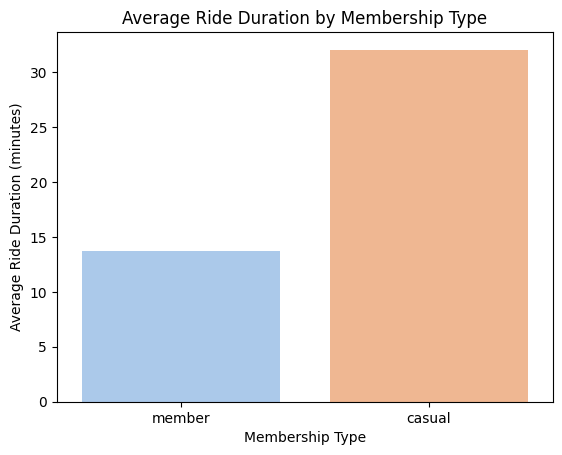

In [ ]:
# // Average ride between membership types

sns.barplot(x=df['member_casual'], y=df['ride_duration'], palette="pastel", hue=df['member_casual'], errorbar=None)
plt.title('Average Ride Duration by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Average Ride Duration (minutes)')
plt.show()

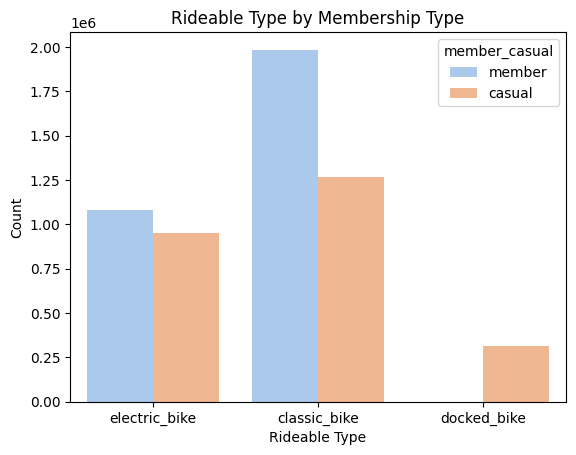

In [106]:
# Different types of rideable bikes
sns.countplot(x='rideable_type', hue='member_casual', data=df, palette="pastel")
plt.title('Rideable Type by Membership Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count') 
plt.show()

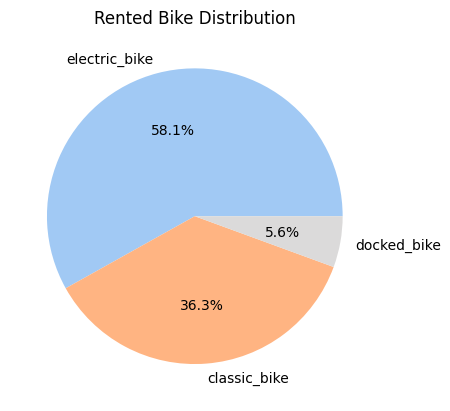

In [124]:
# Rented bike distribution

plt.pie(df['rideable_type'].value_counts(), labels=df['rideable_type'].unique(), autopct='%1.1f%%', colors=['#A1C9F4', '#FFB482', "#DBDADA"])
plt.title('Rented Bike Distribution')
plt.show()

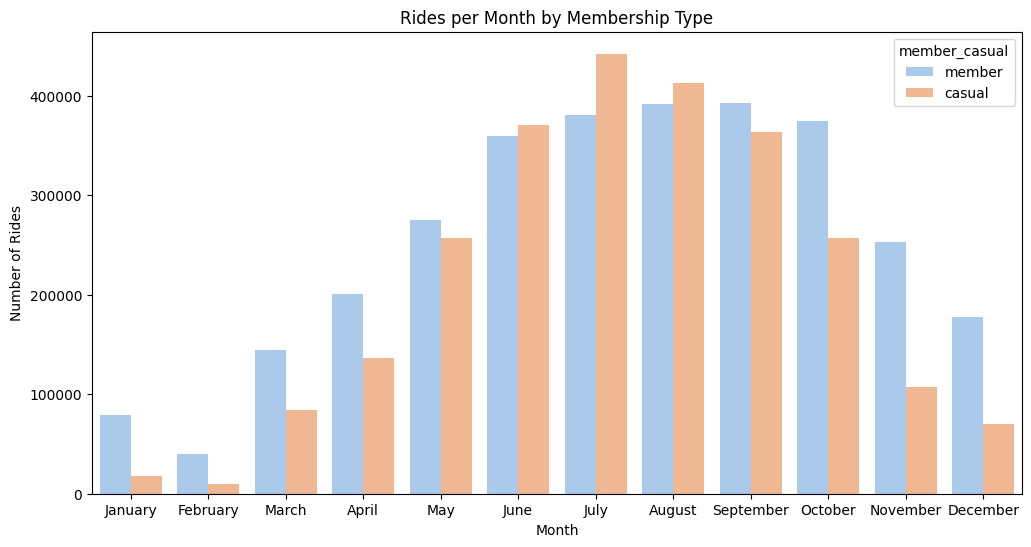

In [121]:
# Rides per month
plt.figure(figsize=(12, 6))
sns.countplot(x=df['month'], hue=df['member_casual'], palette="pastel", order=df['month'])
plt.title('Rides per Month by Membership Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides') 

plt.show()


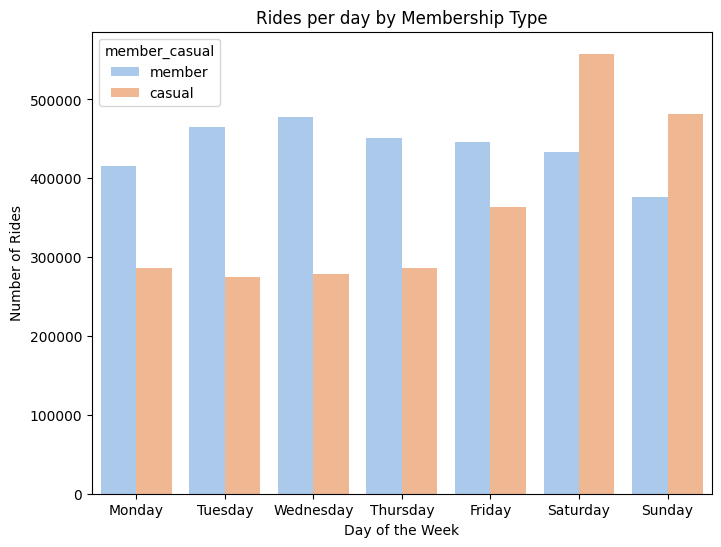

In [126]:
# Rides per day of the week
plt.figure(figsize=(8, 6))
sns.countplot(x=df['day'], hue=df['member_casual'], palette="pastel", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Rides per day by Membership Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides') 

plt.show()
